**BatchNorm** is a very useful technique to accelerate the training of Deep Neural Networks. In batch norm what we do is we shift the mean and variance of the outputs of the previous layer before it goes to the activations. Such shifting is very similar to scaling the inputs to a ML algorithm and causes faster convergence, also somewhat decopules training of one layer from another. It also has a little bit of regularization effect.

**BatchNorm** was first proposed in this paper

https://arxiv.org/pdf/1502.03167.pdf

In the notebook below we will experiment with Batch Norm in tensorflow.


In [1]:
#Do regular imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

2.3.0


In [2]:
#Get MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
#Lets build a simple model
#Build the model
i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(392, activation='relu')(x)
x = Dense(196, activation='relu') (x)
x = Dense(98, activation='relu') (x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1958 - accuracy: 0.9400 - val_loss: 0.1050 - val_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9732 - val_loss: 0.0959 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0763 - val_accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0851 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0823 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0946 - val_accuracy:

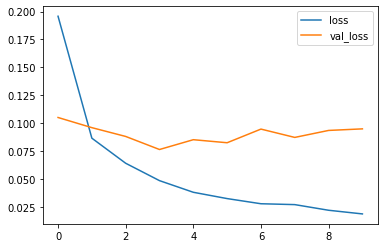

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

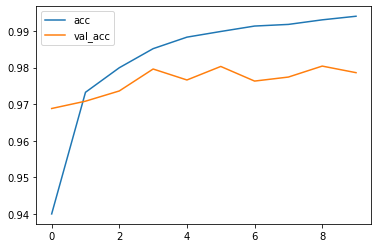

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
#Lets build the model with BatchNorm
#Build the model
i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(392, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(196, activation='relu') (x)
x = BatchNormalization()(x)
x = Dense(98, activation='relu') (x)
x = BatchNormalization()(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2177 - accuracy: 0.9338 - val_loss: 0.1084 - val_accuracy: 0.9654
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1192 - accuracy: 0.9638 - val_loss: 0.0953 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0926 - accuracy: 0.9706 - val_loss: 0.0689 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9763 - val_loss: 0.0810 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0661 - accuracy: 0.9786 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0644 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0757 - val_accuracy:

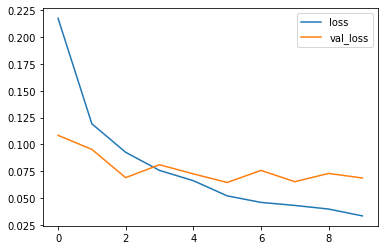

In [9]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

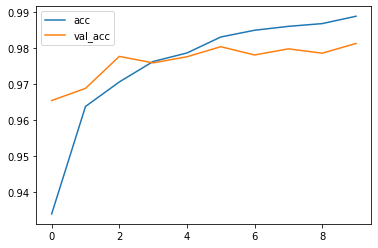

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

With **BatchNorm** we get a better validation set accuracy.